In [1]:
%matplotlib inline

import math

import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt

# Supress nosiy deprecation warning from inside matplotlib
import warnings
warnings.filterwarnings('ignore')

In [178]:
filename = 'data/kpi-maingroups-1979-2016.csv'
raw = pandas.read_csv(filename, encoding='windows-1252', sep=';', header=0, skiprows=[0], skipfooter=8, index_col=0)
raw.columns

Index(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [180]:
cleaned = raw.T.replace('..', numpy.nan)  # .. used to mean no data available
del cleaned[' '] # Entire row for an empty category, filled with 'Konsumprisindex values'
kpi = pandas.DataFrame(dtype=numpy.float64, data=cleaned)
kpi.index = pandas.to_datetime(kpi.index, format='%Y')
kpi['1996':'2016']

,Matvarer og alkoholfrie drikkevarer,Alkoholholdige drikkevarer og tobakk,Klær og skotøy,"Bolig, lys og brensel","Møbler, husholdningsartikler og vedlikehold av innbo",Helsepleie,Transport,Post- og teletjenester,Kultur og fritid,Utdanning,Hotell- og restauranttjenester,Andre varer og tjenester
1996-01-01,69.6,47.0,189.1,57.0,85.6,52.9,62.6,160.9,78.5,44.7,54.1,59.9
1997-01-01,71.9,50.6,188.8,58.6,86.0,54.6,64.9,157.2,79.7,46.9,55.5,61.3
1998-01-01,75.4,55.5,185.2,58.8,86.5,58.8,66.2,152.2,81.1,49.5,58.0,64.6
1999-01-01,77.5,57.2,183.7,60.1,87.6,61.6,68.1,141.9,82.9,51.9,59.9,67.0
2000-01-01,79.0,61.2,175.9,62.9,88.1,63.7,71.8,136.9,84.1,54.6,61.9,68.9
2001-01-01,77.5,63.3,174.5,67.6,88.8,65.6,73.9,132.4,84.9,58.3,64.6,72.0
2002-01-01,76.2,62.8,164.9,70.1,89.1,68.4,74.7,135.1,85.8,63.2,67.3,74.1
2003-01-01,78.7,63.6,147.3,76.2,88.3,71.0,75.5,131.2,85.6,66.8,69.3,76.7
2004-01-01,80.1,68.6,137.2,76.4,86.9,74.2,76.7,126.0,85.7,70.1,70.9,77.4
2005-01-01,81.4,70.3,130.9,77.7,86.4,76.3,80.0,125.1,86.3,71.0,72.1,78.8


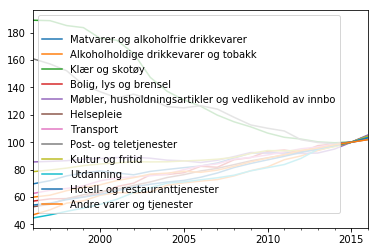

In [181]:
kpi['1996':'2016'].plot()

In [182]:
ref = kpi['1996']
ref

,Matvarer og alkoholfrie drikkevarer,Alkoholholdige drikkevarer og tobakk,Klær og skotøy,"Bolig, lys og brensel","Møbler, husholdningsartikler og vedlikehold av innbo",Helsepleie,Transport,Post- og teletjenester,Kultur og fritid,Utdanning,Hotell- og restauranttjenester,Andre varer og tjenester
1996-01-01,69.6,47.0,189.1,57.0,85.6,52.9,62.6,160.9,78.5,44.7,54.1,59.9


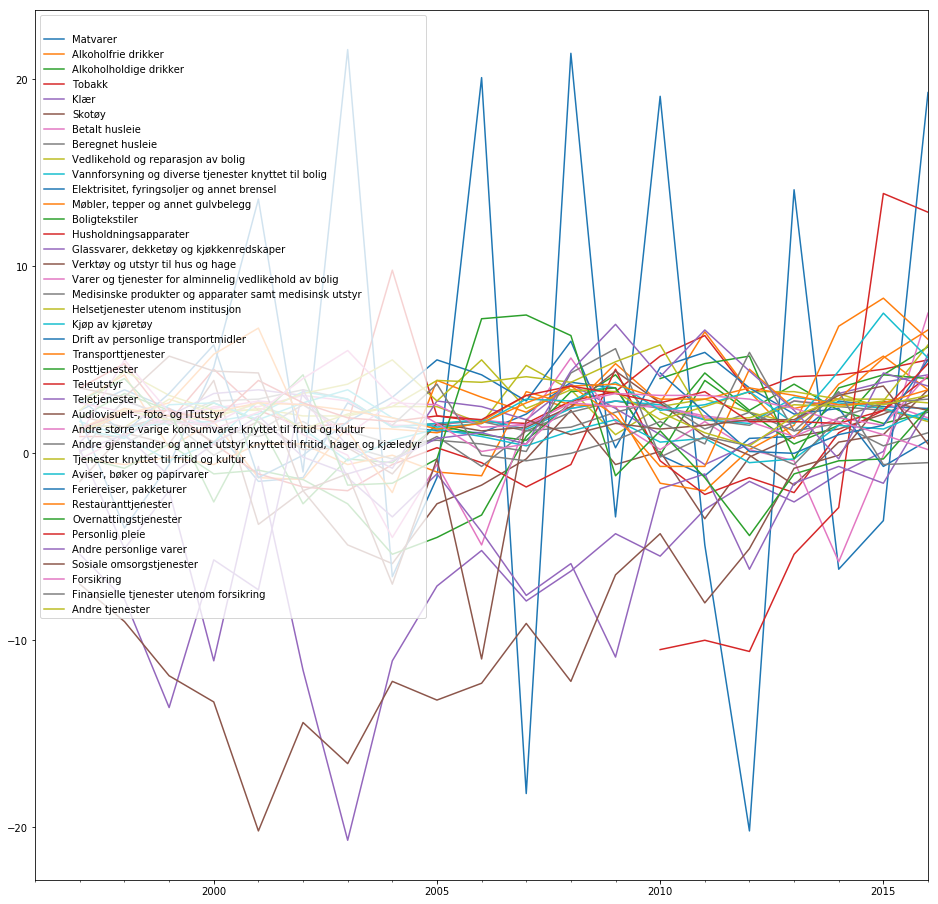

In [175]:
change = kpi['1996':'2016'].diff()
change.plot(figsize=(16,16))

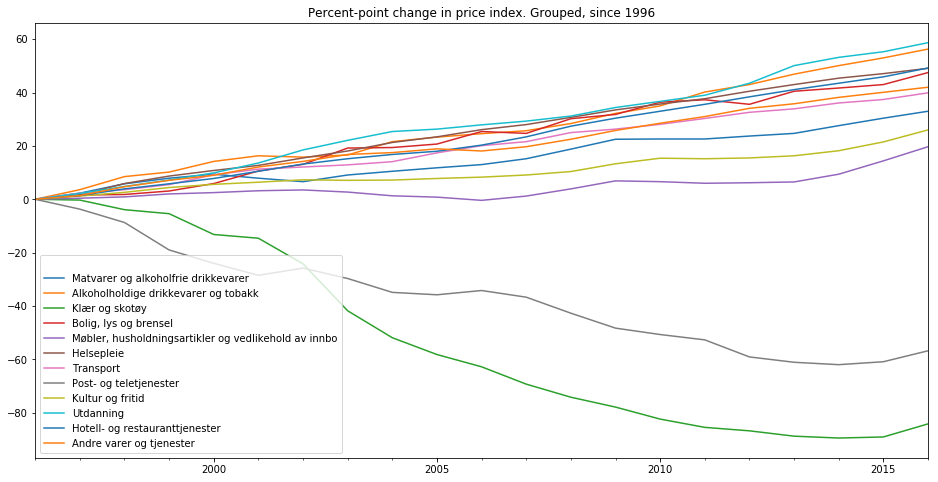

In [186]:
ref = kpi['1996']
def ff(r):
    d = r.values - ref.values[0:]
    s = pandas.Series(data=d[0,:], index=r.index)
    return s
change = kpi['1996':'2016'].apply(ff, axis=1)
change.plot(figsize=(16, 8), title='Percent-point change in price index. Grouped, since 1996')